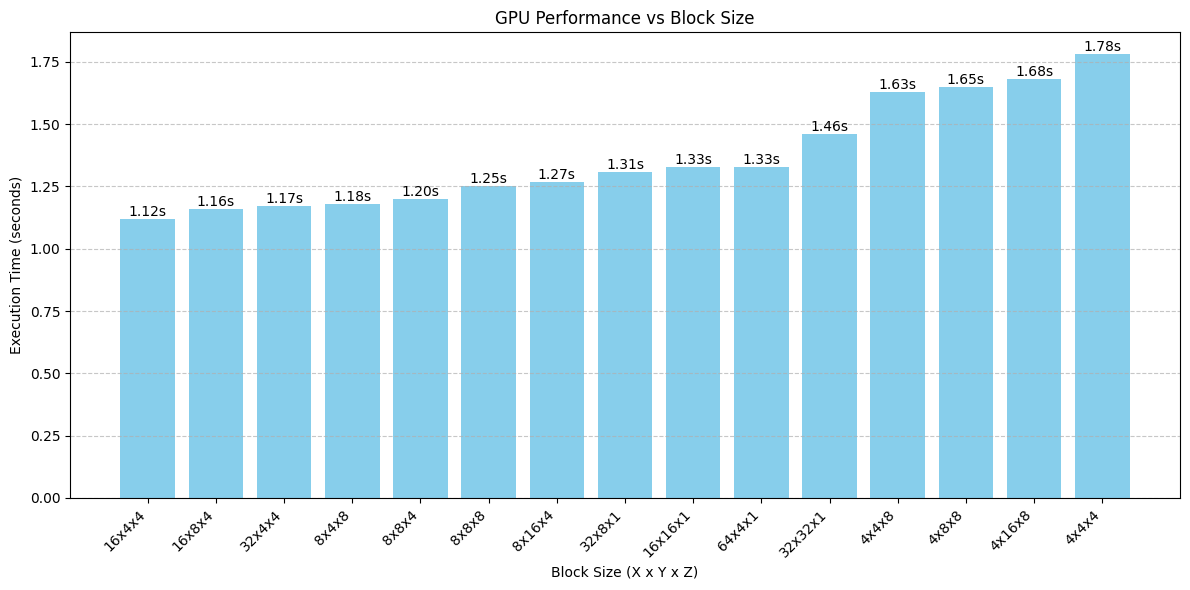

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob

def extract_time(filename):
    with open(filename) as f:
        for line in f:
            if "Time in seconds" in line:
                return float(line.split()[-1])
    return None

def extract_block_size(filename):
    # Извлекаем размер блока из имени файла (например: gpu_8x8x8.txt -> 8x8x8)
    return filename.split('_')[1].split('.')[0]

def extract_performance_data(files):
    data = []
    for file in files:
        block_size = extract_block_size(file)
        time = extract_time(file)
        if time is not None:
            # Преобразуем размер блока в удобный для отображения формат
            dims = tuple(map(int, block_size.split('x')))
            data.append((dims, time))

    # Сортируем по времени выполнения
    data.sort(key=lambda x: x[1])
    return data

def plot_results(data):
    labels = ['x'.join(map(str, dims)) for dims, _ in data]
    times = [time for _, time in data]

    plt.figure(figsize=(12, 6))
    bars = plt.bar(labels, times, color='skyblue')

    # Добавляем значения на столбцы
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}s',
                 ha='center', va='bottom')

    plt.title('GPU Performance vs Block Size')
    plt.xlabel('Block Size (X x Y x Z)')
    plt.ylabel('Execution Time (seconds)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Сохраняем график
    plt.savefig('block_size_performance.png', dpi=300)
    plt.show()

def main():
    # Ищем все файлы результатов
    result_files = glob.glob('gpu_*.txt')

    if not result_files:
        print("No result files found (gpu_*.txt)")
        return

    data = extract_performance_data(result_files)
    plot_results(data)

if __name__ == "__main__":
    main()